In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
# Define the path ot the data folder
data_folder = 'Data/S1/Midterm 2'

In [10]:
# List of all CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
os.listdir(data_folder)

['BVP.csv',
 'info.txt',
 'HR.csv',
 'EDA.csv',
 'TEMP.csv',
 'tags.csv',
 'IBI.csv',
 'ACC.csv']

In [13]:
def read_all_csv_files(root_folder):
    dataframes = {}
    
    # Walk through the directory hierarchy
    for dirpath, _, filenames in os.walk(root_folder):
        for file in filenames:
            if file.endswith('.csv'):
                # Construct the full file path
                file_path = os.path.join(dirpath, file)
                
                # Check if the file is empty
                if os.path.getsize(file_path) == 0:
                    print(f"Skipping empty file: {file_path}")
                    continue
                
                # Read the CSV file into a DataFrame
                try:
                    df = pd.read_csv(file_path)
                    # Use the relative path as the key in the dictionary
                    relative_path = os.path.relpath(file_path, root_folder)
                    dataframes[relative_path] = df
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
    
    return dataframes

In [14]:
# Example usage
root_folder = 'Data'
all_dataframes = read_all_csv_files(root_folder)

Skipping empty file: Data/S4/Midterm 2/tags.csv
Skipping empty file: Data/S4/Final/tags.csv
Skipping empty file: Data/S9/Midterm 2/tags.csv
Skipping empty file: Data/S9/Final/tags.csv
Skipping empty file: Data/S7/Midterm 2/tags.csv
Skipping empty file: Data/S7/Final/tags.csv
Skipping empty file: Data/S5/Midterm 2/tags.csv
Skipping empty file: Data/S5/Final/tags.csv
Skipping empty file: Data/S6/Midterm 2/tags.csv
Skipping empty file: Data/S6/Final/tags.csv
Skipping empty file: Data/S3/Midterm 2/tags.csv
Skipping empty file: Data/S3/Final/tags.csv
Skipping empty file: Data/S1/Midterm 2/tags.csv
Skipping empty file: Data/S1/Final/tags.csv
Skipping empty file: Data/S10/Midterm 2/tags.csv
Skipping empty file: Data/S10/Final/tags.csv
Skipping empty file: Data/S2/Final/tags.csv
Skipping empty file: Data/S8/Midterm 2/tags.csv
Skipping empty file: Data/S8/Final/tags.csv


In [20]:
type(all_dataframes) # dict
all_dataframes.keys() # list of keys
# Check the number of DataFrames
print(f"Number of DataFrames: {len(all_dataframes)}")
# Check the shape of each DataFrame
for key, df in all_dataframes.items():
    print(f"{key}: {df.shape}")
# Check the number of cells in each DataFrame
for key, df in all_dataframes.items():
    num_cells = df.shape[0] * df.shape[1]
    print(f"{key}: {num_cells} cells")
# Check the total number of cells in all DataFrames
total_cells = sum(df.shape[0] * df.shape[1] for df in all_dataframes.values())
print(f"Total number of cells in all DataFrames: {total_cells}")


Number of DataFrames: 191
S4/Midterm 2/BVP.csv: (857143, 1)
S4/Midterm 2/HR.csv: (13384, 1)
S4/Midterm 2/EDA.csv: (53569, 1)
S4/Midterm 2/TEMP.csv: (53569, 1)
S4/Midterm 2/IBI.csv: (450, 2)
S4/Midterm 2/ACC.csv: (428575, 3)
S4/Final/BVP.csv: (1018667, 1)
S4/Final/HR.csv: (15908, 1)
S4/Final/EDA.csv: (63667, 1)
S4/Final/TEMP.csv: (63633, 1)
S4/Final/IBI.csv: (1470, 2)
S4/Final/ACC.csv: (509335, 3)
S4/Midterm 1/BVP.csv: (748397, 1)
S4/Midterm 1/HR.csv: (11685, 1)
S4/Midterm 1/EDA.csv: (46777, 1)
S4/Midterm 1/TEMP.csv: (46777, 1)
S4/Midterm 1/tags.csv: (2, 1)
S4/Midterm 1/IBI.csv: (210, 2)
S4/Midterm 1/ACC.csv: (374203, 3)
S9/Midterm 2/BVP.csv: (795620, 1)
S9/Midterm 2/HR.csv: (12423, 1)
S9/Midterm 2/EDA.csv: (49729, 1)
S9/Midterm 2/TEMP.csv: (49721, 1)
S9/Midterm 2/IBI.csv: (540, 2)
S9/Midterm 2/ACC.csv: (397813, 3)
S9/Final/BVP.csv: (909206, 1)
S9/Final/HR.csv: (14198, 1)
S9/Final/EDA.csv: (56827, 1)
S9/Final/TEMP.csv: (56825, 1)
S9/Final/IBI.csv: (3338, 2)
S9/Final/ACC.csv: (454603, 3)

In [ ]:
# Create a summary DataFrame
summary_data = []

for key, df in all_dataframes.items():
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    total_cells = num_rows * num_columns
    summary_data.append({
        "File Name": key,
        "Rows": num_rows,
        "Columns": num_columns,
        "Total Cells": total_cells
    })

# Convert the summary data into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df.sort_values(by="File Name", ascending=False, inplace=True)

,File Name,Rows,Columns,Total Cells
0,S4/Midterm 2/BVP.csv,857143,1,857143
1,S4/Midterm 2/HR.csv,13384,1,13384
2,S4/Midterm 2/EDA.csv,53569,1,53569
3,S4/Midterm 2/TEMP.csv,53569,1,53569
4,S4/Midterm 2/IBI.csv,450,2,900
...,...,...,...,...
186,S8/Midterm 1/EDA.csv,43123,1,43123
187,S8/Midterm 1/TEMP.csv,43121,1,43121
188,S8/Midterm 1/tags.csv,0,1,0
189,S8/Midterm 1/IBI.csv,210,2,420


In [52]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 125 to 22
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File Name    191 non-null    object
 1   Rows         191 non-null    int64 
 2   Columns      191 non-null    int64 
 3   Total Cells  191 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


In [53]:
summary_df['Total Cells'].sum()

np.int64(75003483)

In [25]:
# Display the summary DataFrame
summary_df.sort_values(by="File Name", ascending=True, inplace=True)

In [30]:
summary_df['File Name'].values

array(['S1/Final/ACC.csv', 'S1/Final/BVP.csv', 'S1/Final/EDA.csv',
       'S1/Final/HR.csv', 'S1/Final/IBI.csv', 'S1/Final/TEMP.csv',
       'S1/Midterm 1/ACC.csv', 'S1/Midterm 1/BVP.csv',
       'S1/Midterm 1/EDA.csv', 'S1/Midterm 1/HR.csv',
       'S1/Midterm 1/IBI.csv', 'S1/Midterm 1/TEMP.csv',
       'S1/Midterm 1/tags.csv', 'S1/Midterm 2/ACC.csv',
       'S1/Midterm 2/BVP.csv', 'S1/Midterm 2/EDA.csv',
       'S1/Midterm 2/HR.csv', 'S1/Midterm 2/IBI.csv',
       'S1/Midterm 2/TEMP.csv', 'S10/Final/ACC.csv', 'S10/Final/BVP.csv',
       'S10/Final/EDA.csv', 'S10/Final/HR.csv', 'S10/Final/IBI.csv',
       'S10/Final/TEMP.csv', 'S10/Midterm 1/ACC.csv',
       'S10/Midterm 1/BVP.csv', 'S10/Midterm 1/EDA.csv',
       'S10/Midterm 1/HR.csv', 'S10/Midterm 1/IBI.csv',
       'S10/Midterm 1/TEMP.csv', 'S10/Midterm 1/tags.csv',
       'S10/Midterm 2/ACC.csv', 'S10/Midterm 2/BVP.csv',
       'S10/Midterm 2/EDA.csv', 'S10/Midterm 2/HR.csv',
       'S10/Midterm 2/IBI.csv', 'S10/Midterm 2/TEMP.cs

In [77]:
filter = [file.startswith('S7/') for file in summary_df['File Name'].values]

In [78]:

summary_df[filter]

,File Name,Rows,Columns,Total Cells
49,S7/Final/ACC.csv,628771,3,1886313
44,S7/Final/BVP.csv,1257532,1,1257532
46,S7/Final/EDA.csv,78595,1,78595
45,S7/Final/HR.csv,19640,1,19640
48,S7/Final/IBI.csv,1080,2,2160
47,S7/Final/TEMP.csv,78593,1,78593
56,S7/Midterm 1/ACC.csv,396277,3,1188831
50,S7/Midterm 1/BVP.csv,792551,1,792551
52,S7/Midterm 1/EDA.csv,49537,1,49537
51,S7/Midterm 1/HR.csv,12375,1,12375


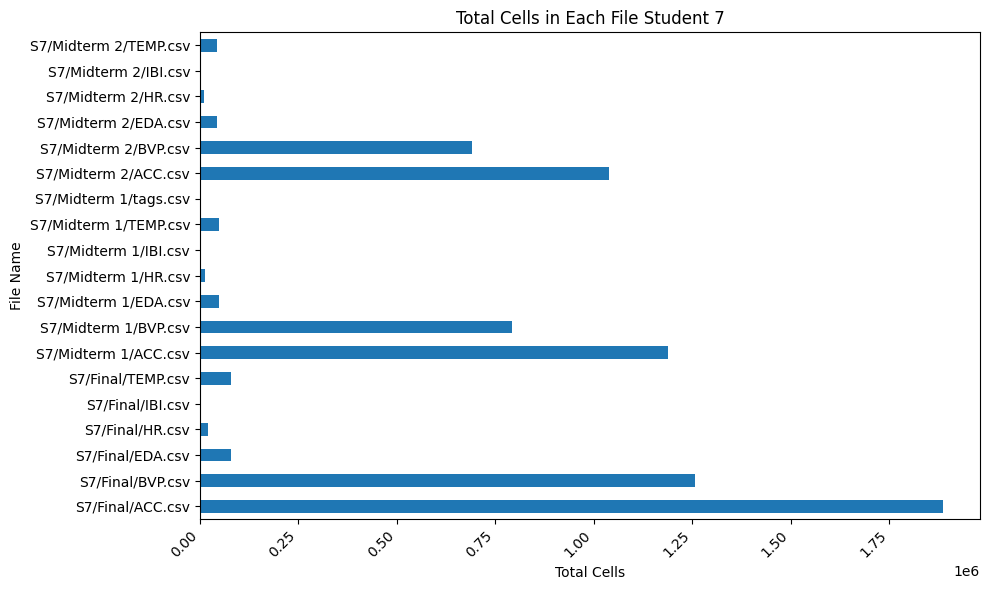

In [81]:
summary_df[filter].plot(x='File Name', y='Total Cells', kind='barh', figsize=(10, 6), legend=False)
plt.title('Total Cells in Each File Student 7')
plt.xlabel('Total Cells')
plt.ylabel('File Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


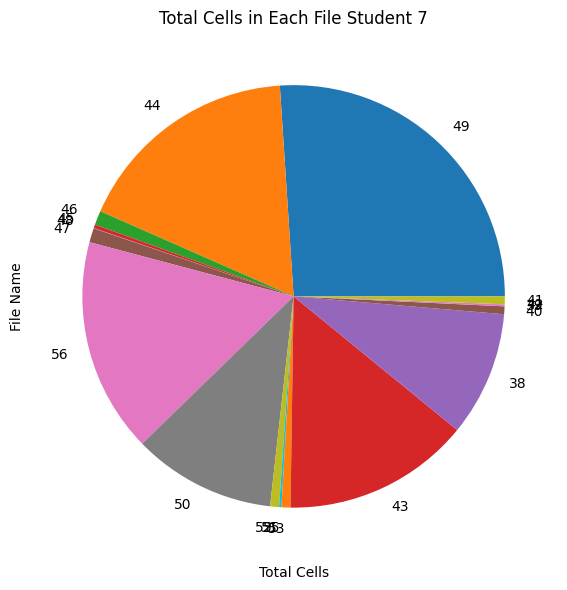

In [82]:
summary_df[filter].plot(x='File Name', y='Total Cells', kind='pie', figsize=(10, 6), legend=False)
plt.title('Total Cells in Each File Student 7')
plt.xlabel('Total Cells')

plt.ylabel('File Name')
plt.tight_layout()

In [83]:
summary_df.describe()

,Rows,Columns,Total Cells
count,1.910000e+02,191.000000,1.910000e+02
mean,2.439213e+05,1.471204,3.926884e+05
std,3.691959e+05,0.752510,5.940370e+05
min,0.000000e+00,1.000000,0.000000e+00
25%,1.142450e+04,1.000000,1.168200e+04
50%,4.884900e+04,1.000000,4.884900e+04
75%,3.876700e+05,2.000000,7.753360e+05
max,1.652608e+06,3.000000,2.478927e+06


In [ ]:
students = [f for f in os.listdir('Data')]
students = sorted(students, key=lambda x: int(x[1:]))

student_dataset_cells = []
for student in students:
    filter = [file.startswith(student+'/') for file in summary_df['File Name'].values]
    total_cell_for_student = summary_df[filter]['Total Cells'].sum()
    student_dataset_cells.append(total_cell_for_student)
    print(f'{student}: {total_cell_for_student} cells')

S1: 7732718 cells
S2: 8676020 cells
S3: 8163443 cells
S4: 6933777 cells
S5: 6651902 cells
S6: 8338647 cells
S7: 7244096 cells
S8: 6530922 cells
S9: 6653210 cells
S10: 8078748 cells


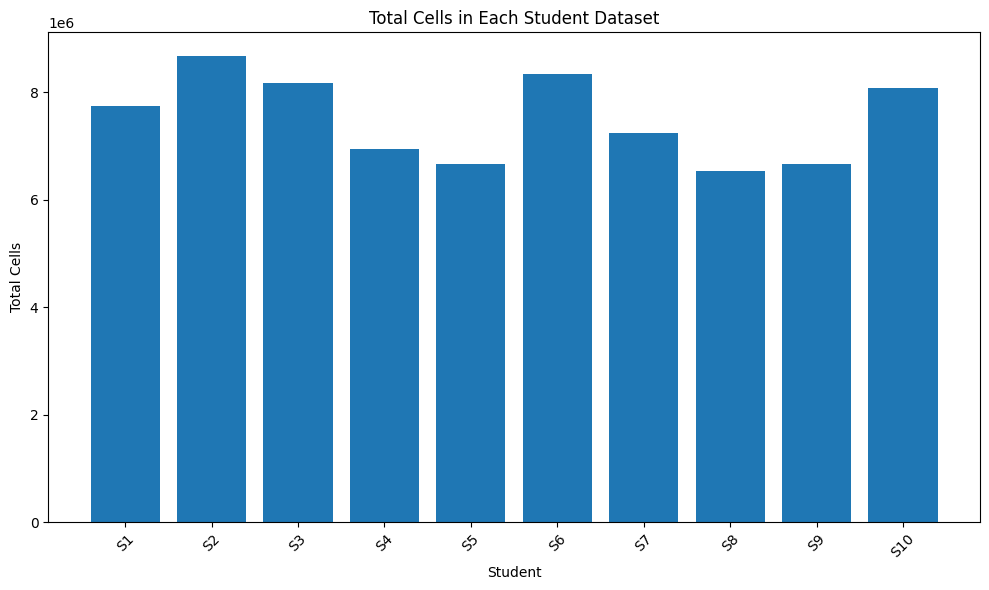

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(students, student_dataset_cells)
plt.xlabel('Student')
plt.ylabel('Total Cells')
plt.title('Total Cells in Each Student Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()